# Pytorch has computation graphs!

In [1]:
# creating a graph in pytorch
import torch
def compute_z(a, b, c):
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    return z

In [2]:
print('scalar inputs: ', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))

scalar inputs:  tensor(1)


In [3]:
print('rank 1 inputs: ', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))
print('rank 2 inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

rank 1 inputs:  tensor([1])
rank 2 inputs: tensor([[1]])


In [4]:
a = torch.tensor(3.14, requires_grad=True)
print(a)

tensor(3.1400, requires_grad=True)


In [5]:
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(b)

tensor([1., 2., 3.], requires_grad=True)


In [6]:
w = torch.tensor([1.0, 2.0, 3.0])
print(w.requires_grad)
w.requires_grad_()
print(w.requires_grad)

False
True


In [7]:
# Xavier Glorot and Yoshua Bengio
import torch.nn as nn
torch.manual_seed(1)
w = torch.empty(2, 3)
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


In [8]:
# simplifying implementations of common architectures via the torch,nn Module

model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [9]:
nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

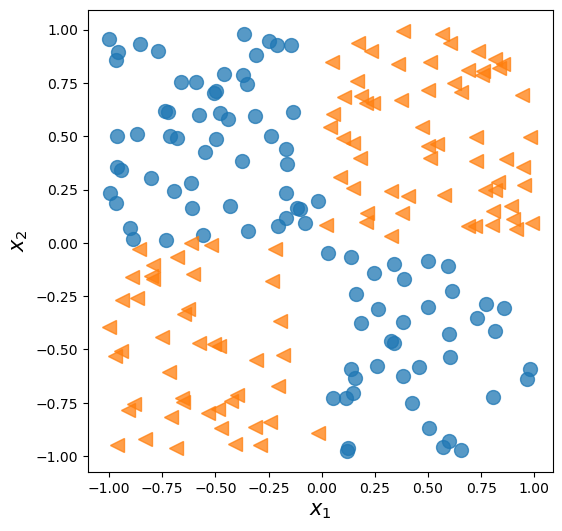

In [10]:
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [11]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [12]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [13]:
torch.manual_seed(1)
import numpy
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
    accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

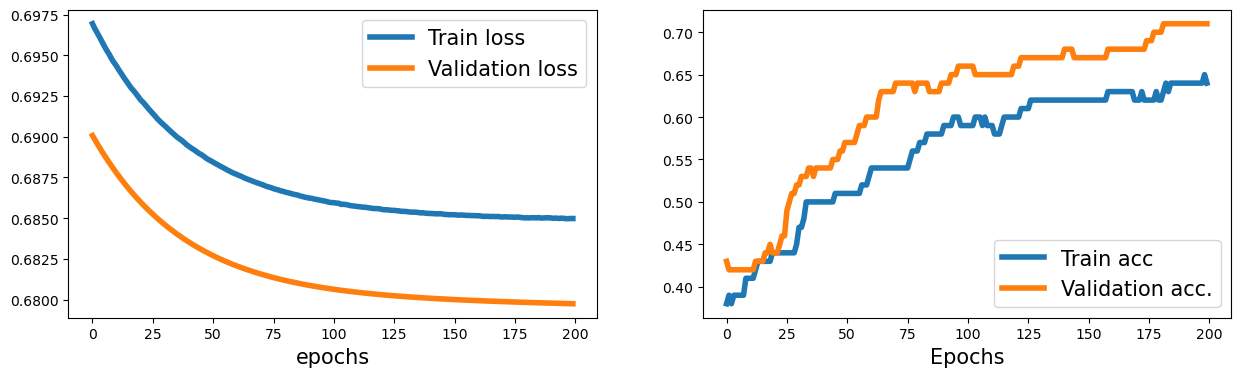

In [14]:
fig =  plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

a simple model with no hidden layer can only derive a linear decision boundary - unable to solve XOR problem 
therefore, we should add one or more hidden layers connected via nonlineaer activation functions. the universal apprx. theorem states that a feedforward NN with a single hidden layer and a relatively large number of hidden units can approximate arbitrary continuous functions relatively well. Thus, one approach for tackling the XOR problem more satisfactorily is to add a hidden layer and compare different numbers of hidden units until we observe satisfactory results on the validation dataset. adding more hidden units would correspond to increasing the width of a layer.

In [15]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [16]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

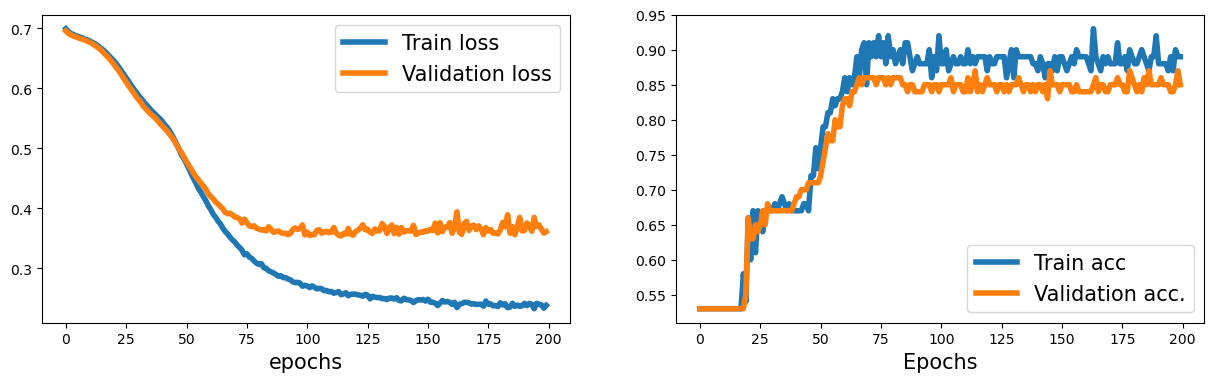

In [17]:
fig =  plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# Making model building more flexible with nn.Module

In [18]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)
    
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()
    
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [19]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

In [20]:
import multiprocessing as mp
from itertools import cycle
from math import ceil, floor

def check_Xy(X, y, y_int=True):
    # check types
    if not isinstance(X, np.ndarray):
        raise ValueError("X must be a NumPy array. Found %s" % type(X))
    if not isinstance(y, np.ndarray):
        raise ValueError("y must be a NumPy array. Found %s" % type(y))

    if "int" not in str(y.dtype):
        raise ValueError(
            "y must be an integer array. Found %s. "
            "Try passing the array as y.astype(np.int_)" % y.dtype
        )

    if not ("float" in str(X.dtype) or "int" in str(X.dtype)):
        raise ValueError("X must be an integer or float array. Found %s." % X.dtype)

    # check dim
    if len(X.shape) != 2:
        raise ValueError("X must be a 2D array. Found %s" % str(X.shape))
    if len(y.shape) > 1:
        raise ValueError("y must be a 1D array. Found %s" % str(y.shape))

    # check other
    if y.shape[0] != X.shape[0]:
        raise ValueError(
            "y and X must contain the same number of samples. "
            "Got y: %d, X: %d" % (y.shape[0], X.shape[0])
        )
    
def get_feature_range_mask(X, filler_feature_values=None, filler_feature_ranges=None):
    """
    Function that constucts a boolean array to get rid of samples
    in X that are outside the feature range specified by filler_feature_values
    and filler_feature_ranges
    """

    if not isinstance(X, np.ndarray) or not len(X.shape) == 2:
        raise ValueError("X must be a 2D array")
    elif filler_feature_values is None:
        raise ValueError("filler_feature_values must not be None")
    elif filler_feature_ranges is None:
        raise ValueError("filler_feature_ranges must not be None")

    mask = np.ones(X.shape[0], dtype=bool)
    for feature_idx in filler_feature_ranges:
        feature_value = filler_feature_values[feature_idx]
        feature_width = filler_feature_ranges[feature_idx]
        upp_limit = feature_value + feature_width
        low_limit = feature_value - feature_width
        feature_mask = (X[:, feature_idx] > low_limit) & (X[:, feature_idx] < upp_limit)
        mask = mask & feature_mask

    return mask


def parallel(X_predict, clf, xtype):
    Z = clf.predict(X_predict.astype(xtype))
    return Z

def format_kwarg_dictionaries(
    default_kwargs=None, user_kwargs=None, protected_keys=None
):
    """Function to combine default and user specified kwargs dictionaries

    Parameters
    ----------
    default_kwargs : dict, optional
        Default kwargs (default is None).
    user_kwargs : dict, optional
        User specified kwargs (default is None).
    protected_keys : array_like, optional
        Sequence of keys to be removed from the returned dictionary
        (default is None).

    Returns
    -------
    formatted_kwargs : dict
        Formatted kwargs dictionary.
    """
    formatted_kwargs = {}
    for d in [default_kwargs, user_kwargs]:
        if not isinstance(d, (dict, type(None))):
            raise TypeError(
                "d must be of type dict or None, but " "got {} instead".format(type(d))
            )
        if d is not None:
            formatted_kwargs.update(d)
    if protected_keys is not None:
        for key in protected_keys:
            formatted_kwargs.pop(key, None)

    return formatted_kwargs


def plot_decision_regions(
    X,
    y,
    clf,
    feature_index=None,
    filler_feature_values=None,
    filler_feature_ranges=None,
    ax=None,
    X_highlight=None,
    zoom_factor=1.0,
    legend=1,
    hide_spines=True,
    markers="s^oxv<>",
    colors=(
        "#1f77b4,#ff7f0e,#3ca02c,#d62728,"
        "#9467bd,#8c564b,#e377c2,"
        "#7f7f7f,#bcbd22,#17becf"
    ),
    scatter_kwargs=None,
    contourf_kwargs=None,
    contour_kwargs=None,
    scatter_highlight_kwargs=None,
    n_jobs=None,
):
    """Plot decision regions of a classifier.

    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See https://matplotlib.org/examples/color/named_colors.html for more
    information.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.

    y : array-like, shape = [n_samples]
        True class labels.

    clf : Classifier object.
        Must have a .predict method.

    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.

    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.

    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.

    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.

    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.

    zoom_factor : float (default: 1.0)
        Controls the scale of the x- and y-axis of the decision plot.

    hide_spines : bool (default: True)
        Hide axis spines if True.

    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.

    markers : str (default: 's^oxv<>')
        Scatterplot markers.

    colors : str (default: 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.

    scatter_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.

    contourf_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contourf function.

    contour_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contour function
        (which draws the lines between decision regions).

    scatter_highlight_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.

    n_jobs : int or None, optional (default=None)
        The number of CPUs to use to do the computation using Python's
        multiprocessing library.
        `None` means 1.
        `-1` means using all processors. New in v0.22.0.

    Returns
    ---------
    ax : matplotlib.axes.Axes object

    Examples
    -----------
    For usage examples, please see
    https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

    """

    check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if n_jobs is None:
        n_jobs = 1

    if ax is None:
        ax = plt.gca()

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError("X_highlight must be a NumPy array or None")
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError("X_highlight must be a 2D array")

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError("feature_index requires more than one training feature")
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                "Unable to unpack feature_index. Make sure feature_index "
                "only has two dimensions."
            )
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                "feature_index values out of range. X.shape is {}, but "
                "feature_index is {}".format(X.shape, feature_index)
            )
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError(
                "Filler values must be provided when "
                "X has more than 2 training features."
            )

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    "filler_feature_values and filler_feature_ranges must "
                    "have the same keys"
                )

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                "Column(s) {} need to be accounted for in either "
                "feature_index or filler_feature_values".format(missing_cols)
            )

    # Check that the n_jobs isn't higher than the available CPU cores
    if n_jobs > mp.cpu_count():
        raise ValueError(
            "Number of defined CPU cores is more than the available resources {} ".format(
                mp.cpu_count()
            )
        )

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(",")
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = (
        X[:, x_index].min() - 1.0 / zoom_factor,
        X[:, x_index].max() + 1.0 / zoom_factor,
    )
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = (
            X[:, y_index].min() - 1.0 / zoom_factor,
            X[:, y_index].max() + 1.0 / zoom_factor,
        )

    xnum, ynum = plt.gcf().dpi * plt.gcf().get_size_inches()
    xnum, ynum = floor(xnum), ceil(ynum)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=xnum), np.linspace(y_min, y_max, num=ynum)
    )

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]

    if n_jobs == 1:
        Z = clf.predict(X_predict.astype(X.dtype))
        Z = Z.reshape(xx.shape)
    else:
        if n_jobs == -1:
            cpus = mp.cpu_count()
        else:
            cpus = n_jobs
        pool = mp.Pool(cpus)
        partQuant = len(X_predict) / cpus
        partitions = []
        for n in range(cpus - 1):
            start, end = np.floor(partQuant * n).astype(int), np.floor(
                partQuant * (n + 1)
            ).astype(int)
            partitions.append(X_predict[start:end])
        partitions.append(X_predict[end:])
        xtype = X.dtype
        Z = pool.starmap(parallel, [(x, clf, xtype) for x in partitions])
        pool.close()
        Z = np.concatenate(Z)
        Z = Z.reshape(xx.shape)

    # Plot decisoin region
    # Make sure contourf_kwargs has backwards compatible defaults
    contourf_kwargs_default = {"alpha": 0.45, "antialiased": True}
    contourf_kwargs = format_kwarg_dictionaries(
        default_kwargs=contourf_kwargs_default,
        user_kwargs=contourf_kwargs,
        protected_keys=["colors", "levels"],
    )
    cset = ax.contourf(
        xx, yy, Z, colors=colors, levels=np.arange(Z.max() + 2) - 0.5, **contourf_kwargs
    )

    contour_kwargs_default = {"linewidths": 0.5, "colors": "k", "antialiased": True}
    contour_kwargs = format_kwarg_dictionaries(
        default_kwargs=contour_kwargs_default,
        user_kwargs=contour_kwargs,
        protected_keys=[],
    )
    ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)

    ax.axis([xx.min(), xx.max(), yy.min(), yy.max()])

    # Scatter training data samples
    # Make sure scatter_kwargs has backwards compatible defaults
    scatter_kwargs_default = {"alpha": 0.8, "edgecolor": "black"}
    scatter_kwargs = format_kwarg_dictionaries(
        default_kwargs=scatter_kwargs_default,
        user_kwargs=scatter_kwargs,
        protected_keys=["c", "marker", "label"],
    )
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                X,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(
            x=x_data,
            y=y_data,
            c=colors[idx],
            marker=next(marker_gen),
            label=c,
            **scatter_kwargs
        )

    if hide_spines:
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                X_highlight,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        # Make sure scatter_highlight_kwargs backwards compatible defaults
        scatter_highlight_defaults = {
            "c": "none",
            "edgecolor": "black",
            "alpha": 1.0,
            "linewidths": 1,
            "marker": "o",
            "s": 80,
        }
        scatter_highlight_kwargs = format_kwarg_dictionaries(
            default_kwargs=scatter_highlight_defaults,
            user_kwargs=scatter_highlight_kwargs,
        )
        ax.scatter(x_data, y_data, **scatter_highlight_kwargs)

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, framealpha=0.3, scatterpoints=1, loc=legend)

    return ax

C:\Users\justc\AppData\Local\Temp\ipykernel_45912\2217701692.py:355: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx, yy, Z, colors=colors, levels=np.arange(Z.max() + 2) - 0.5, **contourf_kwargs


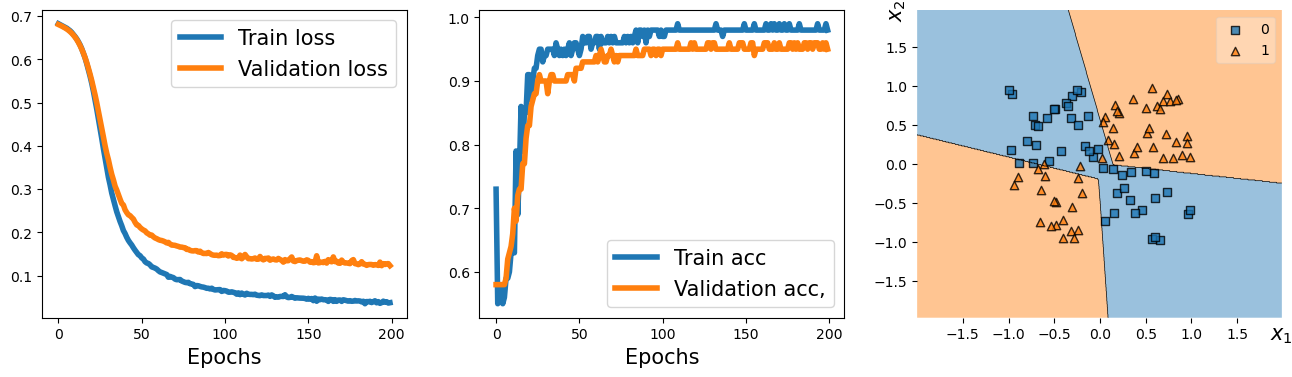

In [21]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc', 'Validation acc,'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
y_tr = y_valid.numpy()
plot_decision_regions(X = x_valid.numpy(), y = y_tr.astype(np.int_), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

# Writing custom layers in PyTorch

In [22]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w) # nn.Parameter is a Tensor
                                                # that's a module parameter
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev
    
    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)

In [23]:
torch.manual_seed(1)
noisy_layer = NoisyLinear(4, 2)
x = torch.zeros((1, 4))
print(noisy_layer(x, training=True))
print(noisy_layer(x, training=True))
print(noisy_layer(x, training=False))

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)
tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [24]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
    
    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()
    
torch.manual_seed(1)
model = MyNoisyModule()
model


MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [25]:
import torch.nn as nn
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
torch.manual_seed(1)
loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, training = True)
        pred = pred[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = (
            (pred>=0.5).float() == y_batch.float()
        ).float()
        accuracy_hist_train[epoch] += is_correct.mean()
    loss_hist_train[epoch] /= n_train/batch_size # pyright: ignore[reportArgumentType, reportCallIssue]
    accuracy_hist_train[epoch] /= n_train/batch_size # pyright: ignore[reportCallIssue, reportArgumentType]
    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

In [26]:
accuracy_hist_valid

[tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5300),
 tensor(0.5600),
 tensor(0.5600),
 tensor(0.5600),
 tensor(0.5600),
 tensor(0.6300),
 tensor(0.6600),
 tensor(0.6700),
 tensor(0.6800),
 tensor(0.7000),
 tensor(0.7300),
 tensor(0.7500),
 tensor(0.7800),
 tensor(0.7500),
 tensor(0.8100),
 tensor(0.8100),
 tensor(0.8100),
 tensor(0.8500),
 tensor(0.8400),
 tensor(0.8300),
 tensor(0.8500),
 tensor(0.8600),
 tensor(0.8600),
 tensor(0.8600),
 tensor(0.8700),
 tensor(0.8800),
 tensor(0.9200),
 tensor(0.8700),
 tensor(0.9000),
 tensor(0.9000),
 tensor(0.9300),
 tensor(0.9100),
 tensor(0.9300),
 tensor(0.9100),
 tensor(0.9100),
 tensor(0.9100),
 tensor(0.9300),
 tensor(0.9300),
 tensor(0.9800),
 tensor(0.9500),
 tensor(0.9600),
 tensor(0.9600),
 tensor(0.9600),
 tensor(0.9700),
 tensor(0.9600

C:\Users\justc\AppData\Local\Temp\ipykernel_45912\2217701692.py:355: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx, yy, Z, colors=colors, levels=np.arange(Z.max() + 2) - 0.5, **contourf_kwargs


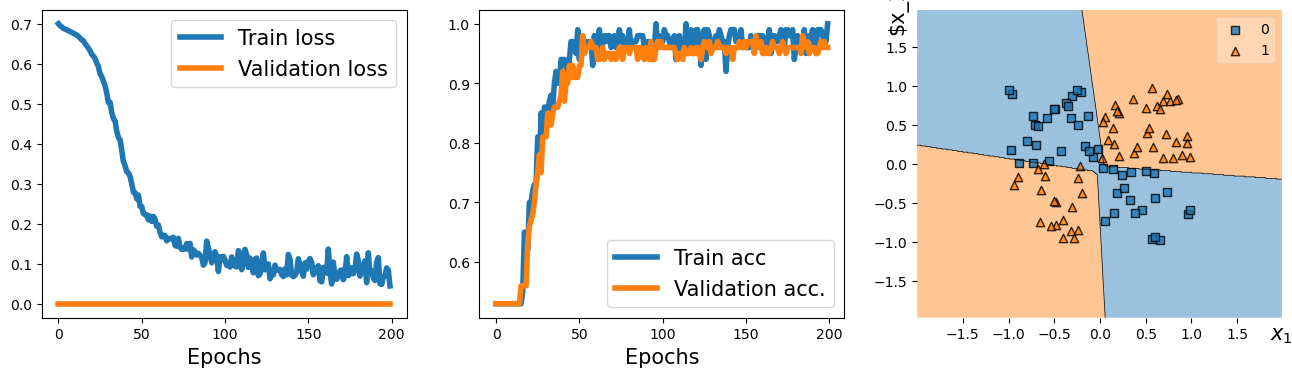

In [27]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
y_tr = y_valid.numpy()
plot_decision_regions(X = x_valid.numpy(), y = y_tr.astype(np.int_), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

# Project 1: Predicting the fuel efficiency of a car

In [28]:
import pandas as pd 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)
df = df.dropna()
df = df.reset_index(drop=True)

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [29]:

from sklearn.model_selection import train_test_split 
df_train, df_test = train_test_split(
    df, train_size=0.8, random_state=1
)
train_stats = df_train.describe().transpose()

train_stats


,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
Horsepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
Weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
Acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
Model Year,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.591054,0.807923,1.0,1.0,1.0,2.0,3.0


In [30]:

numeric_column_names = [
    'Cylinders', 'Displacement',
    'Horsepower', 'Weight',
    'Acceleration'
]

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean' ] 
    std = train_stats.loc[col_name, 'std' ]
    df_train_norm[col_name] = (df_train_norm[col_name] - mean) / std
    df_test_norm[col_name] = (df_test_norm[col_name] - mean) / std

df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


In [34]:
# bucket = { 0 if year < 73, 1 if 73 <= year < 76, 2 if 76 <= year < 79, 3 if year > 79 }
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(
    v, boundaries, right=True
)
v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(
    v, boundaries, right=True
)

numeric_column_names.append('Model Year Bucketed')

In [35]:
from torch.nn.functional import one_hot
total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(
    df_train_norm['Origin'].values) % total_origin
)
x_train_numeric = torch.tensor(
    df_train_norm[numeric_column_names].values
)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()
origin_encoded = one_hot(torch.from_numpy(
    df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

In [36]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

In [37]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [38]:
hidden_units = [8, 4]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=10, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [39]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

In [40]:
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss '
                f'{loss_hist_train/len(train_dl):.4f}')

Epoch 0 Loss 562.9755
Epoch 20 Loss 8.4566
Epoch 40 Loss 7.7820
Epoch 60 Loss 7.5558
Epoch 80 Loss 7.2541
Epoch 100 Loss 7.0213
Epoch 120 Loss 6.6603
Epoch 140 Loss 7.1141
Epoch 160 Loss 7.6563
Epoch 180 Loss 6.6028


In [41]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 8.6631
Test MAE: 1.9921


# Project 2: Classifying MNIST handwritten digits

In [42]:
import torchvision

from torchvision import transforms
image_path = './'
transform = transforms.Compose([
    transforms.ToTensor()
])
mnist_train_dataset = torchvision.datasets.MNIST(
    root = image_path, train=True,
    transform = transform, download=False
)
mnist_train_dataset = torchvision.datasets.MNIST(
    root = image_path, train=False,
    transform = transform, download=False
)
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)

In [43]:
hidden_units = [32, 16]
image_size = mnist_train_dataset[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]
all_layers = [nn.Flatten()]
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)